# Ch7. 신경망

[관련 연구]
- 신경망을 사용해 주식 수익률의 횡단면 가장 잘 설명할 수 있는 팩터 찾음
- 기업의 속성 & 거시경제 변수 -> 미래 수익률에 매핑
- 생성형 적대적 네트워크를 포함한 복잡한 신경망 구조로 가격 결정 커널 추정

[7.1] 오리지널 퍼셉트론
- 각각의 퍼셉트론: 단순 유닛 => 이 유닛은 층(layer)을 구성함
[7.2] 다층 퍼셉트론 (MLP)
- 헤비사이드(계단) 함수 = 활성화 함수: 목적은 매우 선형적인 모델에 비선형성 도입
(*) Notation:
- 데이터: 특성행렬 $X=x_{i,j}$ & 출력값 백터 $y=y_i$ 
- $x_i$: $X$의 한 줄을 나타냄
- 층 $l$에 위치한 유닛 $k$의 가중치: $W_k^{(l)}=w_{k,j}^{(l)}$ & 편향 $b_k^{(l)}$ & len=$U_{l-1}$
- 활성화 후출력: $o_{i,k}^{(l)}$ ~ i번째 인스턴스, l번째 층, k번째 유닛에 대한 출력

1. 은닉층 선형 결합
$$\\ v^{(l)}_{i,k} = (o^{(l-1)}_i)' w^{(l)}_k + b^{(l)}_k, \quad \text{for } l \ge 2$$
2. 은닉층 활성화
$$\\ o^{(l)}_{i,k} = f^{(l)}(v^{(l)}_{i,k})$$
3. 출력층 예측
$$\\ \tilde{y}_i = f^{(L+1)} \left( (o^{(L)}_i)' w^{(L+1)} + b^{(L+1)} \right)$$

- 레이블이 숫자인 경우: 출력=단일 수치
- 범주형인 경우: 범주의 개수와 같은 벡터(특정 카테고리에 속할 확률 나타냄)

[7.2.2] 보편 근사화
-> 신경망이 잘 작동하는 이유: 유계 연속 함수가 주어지면 이 함수를 임의의 정밀도까지 근사화할 수 있는 단일 계층 네트워크가 존재함
- 단일 계층 퍼셉트론:
$\\ f_n(x) = \sum_{l=1}^{n} c_l \phi(x w_l + b_l) + c_0$
- 모든 연속함수 $f$에 대해 하나의 $n$ 구할 수 있음: $|f(x) - f_n(x)|<\epsilon, \forall x \in [0,1]^d$
- 다항식 근사화와 유사 but 활성화 함수으 속성에 따라 차이 발생
- Result: 유닛의 개수를 늘릴 수 있는 한 간단한 신경망을 잘 작동하는 함수 $f$로 충분히 만들 수 있음
- 무작위로 샘플링한 $N$개의 $i.i.d.$ 포인트 $y_i=f(x_i)+\epsilon_i$에 대해 $f_n$이 훈련된 경우 최고의 경험치적 MSE:
$\\ E[(f(x) - f_n(x))^2] = O\left(\frac{c_f}{n}\right) + O\left(\frac{nK \log(N)}{N}\right)$
$\\ \rarr$ 1st 항: 네트워크 크기(복잡성) ~ 오차는 네트워크의 유닛 수에 따라 감소함
$\\ \rarr$ 2nd 항: 표본의 크기는 학습 품질을 결정하는 핵심 요소 ~ 오차가 관측 수에 비해 느린 속도로 감소 => 유닛 개수 & 입력 크기에 따라 선형임(표본 작으면 복잡한 모델 쓸모 없음)

[7.2.3] 역전파를 통한 학습
- 신경망: 약간의 불이익 감수하고 손실 함수를 최소화하는 방식으로 학습함
$O=\sum^I_{i=1}loss(y_i,\tilde{y}_i)+\text{패널티 항}$
- 손실 함수: in 회귀, 제곱오차 / in 분류, 교차 엔트로피
- 신경망의 학습: 모든 층에서 모든 유닛의 가중치를 변경해 위에서 정의한 $O$가 가장 최소가 되도록 함
$\\$Let's $D(\tilde{y}_i(W))=loss(y_i,\tilde{y}_i)$
- 가중치 업데이트 by 경사 하강법: $W\ \larr W-\eta\frac{\partial D(\tilde{y}_i)}{\partial W}$
- 연속적인 망으로 구성된 계층들과 관련된 활성화: 미분 연쇄 법칙의 수많은 반복을 요구함
- $l$번째 레이어에서 가중치 & 편향에 대한 경사 계산할 때 두 부분 있음:
1. 이전 레이어로부터 재활용할 수 있는 부분
2. 현재 레이어의 값과 활성화 함수로부터만 얻을 수 있는 부분

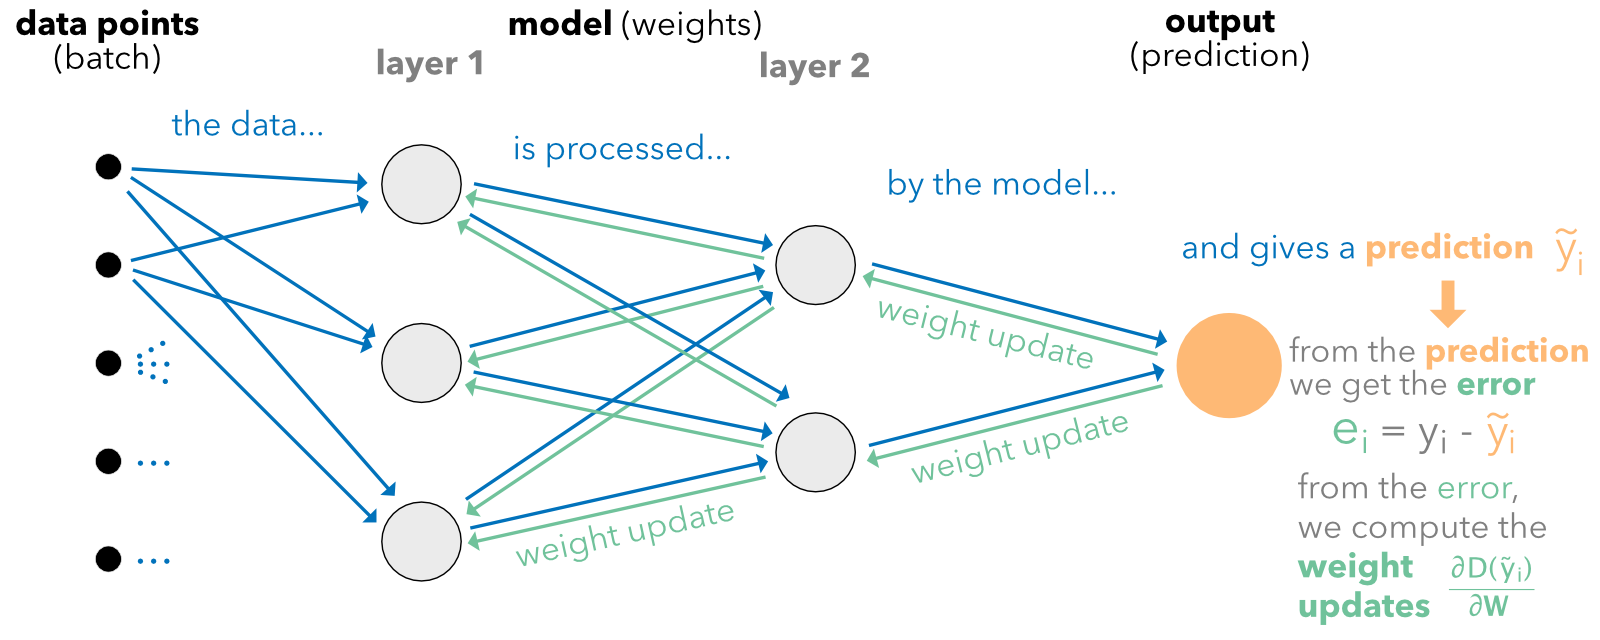

=> 역전파 알고리듬 w/ 데이터 포인트 샘플:
1. 데이터: 좌측에서 흘러 들어옴 ~ 순전파(Forward Pass)
2. 순전파: 오차 or 손실 함수 계산
3. for 가중치 & 편향, 이 함수의 모든 도함수: 마지막 층계에서 시작해 좌측으로 확산 ~ 역전파(Backward Pass)
4. 샘플 포인트를 기반으로 모든 가중치와 편향 업데이트 됨

(*) 학습률 조정:
1. $\\$각 Epoch 지난 후 업데이트 강도 줄임 
$\\ \eta=\alpha e^{-\beta t}$ ~ t: 에포크, $\alpha,\ \beta>0$
2. 모멘텀 사용 -> 최근 조정에 대한 기억 항 추가 => 현재 업데이트를 같은 방향으로 진행 => 수렴의 속도 높임
$$m_t \leftarrow \eta \frac{\partial D(\tilde{y}_i)}{\partial W_t} + \gamma m_{t-1}$$$$W_{t+1} \leftarrow W_t - m_t$$

[7.2.4] 분류에 관한 추가적 Detail
네트워크의 가장 끝에 적절한 활성화 함수 ~ Softmax 함수 사용:
$\\ s(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{J} e^{x_j}}$ ~ 클래스에 대한 확률 벡터 산출
손실함수: Cross-Entropy 사용: 
$\\ CE(y_i, \tilde{y}_i) = - \sum_{j=1}^{J} y_{i,j} \log(\tilde{y}_{i,j})$ ~ 두 인자 간 비유사도에 대한 대용치

[7.3] How deep 신경망? & Other Issues
- 매개 변수 개수: 인스턴스 개수보다 훨씬 작아야 함
- 현재 금융 응용 분야: 은닉층 개수는 서너 개 넘지 않음
$\\$If 입력에 I개의 특성, 출력에 O개의 차원, L개의 은닉층 ~ k번째 레이어의 유닛 개수:
$\\ U_k \approx \left\lfloor O \left(\frac{I}{O}\right)^{\frac{L+1-k}{L+1}} \right\rfloor$
$\\ \rarr$ 출력 크기에 따라 유닛 개수 기하급수적으로 감소
$\\$If 중간 레이어: 한 개, $\sqrt{IO}$의 정수 부분
- 매우 큰 아키텍처가 더 얕은 아키텍처보다 항상 더 나은 성능을 발휘하는 건 아님

[7.3.2] 가중치 업데이트의 빈도와 학습 듀레이션
- 배치(Batch) 라고 부르는 인스턴스 그룹에 대해 가중치 업데이트 수행됨
- 에포크: 샘플의 각 인스턴스가 가중치 업데이트(= 훈련)에 기여했을 때, 하나의 에포크에 도달함
- 배치 크기: 가중치의 단일 업데이트에서 사용하는 샘플의 개수
(i) 배치=only 1 인스턴스: '확률적 경사 하강(SGD)' ~ 인스턴스 무작위 선택
(ii) 1 < 배치 < 인스턴스: '미니' 배치 ~ 무작위 선택 but 비복원 추출
- 반복 횟수: 샘플 크기를 배치 크기로 나눈 비율 * 에포크 수


[7.3.3] 페널티와 드롭아웃
각 수준(Layer)에서 가중치(, 편향)에 대한 제약 조건이나 페널티 적용 가능 ~ in order to 훈련 샘플에 대한 과최적화 방지
- 페널티: 손실 함수에 직접 적용됨 => 목적함수:
$\\ O=\sum_{i=1}^I \text{loss}(y_i,\tilde{y}_i)+ \sum_{k} \lambda_k||\textbf{W}_k||_1+ \sum_j\delta_j||\textbf{W}_j||_2^2$
- 첨자 $k,\ j$: 각각 $L^1,\ L^2$ 페널티가 적용되는 가중치
- 훈련 중 가중치에 직접적 제약 조건 적용 가능
(i) 노름 제약: 가중치 벡터 or 행렬에 대한 최대 노름 고정
(ii) 비음수 제약: 모든 가중치는 양수 or 0
- 모델 크기 줄이기 ~ DropOut

[7.4] 코드 및 바닐라 MLP
신경망 구축 가능케 하는 프레임워크 & 라이브러리: Keras, Tensorflow, PyTorch

In [2]:
# 패널티 예측 회귀
from Ch1 import data_ml, features, idx_train, idx_test
training_sample=data_ml[data_ml.index.isin(idx_train)]
testing_sample=data_ml[data_ml.index.isin(idx_test)]

In [4]:
!pip install plot_keras_history

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created 

In [5]:
# Step 1. 회귀
# Keras: Tensorflow의 고차원 API
import tensorflow as tf
from plot_keras_history import show_history, plot_history
NN_train_features=training_sample[features].values
NN_train_labels=training_sample['R1M_Usd'].values
NN_test_featurs=testing_sample[features].values
NN_test_labels=testing_sample['R1M_Usd'].values


In Keras:
1. 네트워크의 구조/아키텍처 정의
2. 손실 함수 및 학습 프로세스(가중치 업데이트에 대한 옵션) 설정
3. 배치 크기와 라운드 개수(에포크) 지정

In [6]:
# Ex. 2개의 은닉층
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(len(features),))) # input_shape: 첫 번째 층계에서만 필요
model.add(layers.Dense(8,activation='tanh')) # 양/음수 출력 모두 생성 ~ 마지막에서 두 번째 층계에 사용
model.add(layers.Dense(1))

c:\Users\82103\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='RMSprop', # 고전적인 미니 배치 역전파 구현(가중치 업데이트 알고리듬)
              loss='mse',
              metrics=['MeanAbsoluteError']) # 모델의 품질 평가 ~ 손실 함수와 다를 수 있음
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │         1,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,633 (6.38 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - MeanAbsoluteError: 0.0856 - loss: 0.0294 - val_MeanAbsoluteError: 0.0672 - val_loss: 0.0371
Epoch 2/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - MeanAbsoluteError: 0.0840 - loss: 0.0290 - val_MeanAbsoluteError: 0.0671 - val_loss: 0.0371
Epoch 3/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - MeanAbsoluteError: 0.0839 - loss: 0.0290 - val_MeanAbsoluteError: 0.0671 - val_loss: 0.0371
Epoch 4/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - MeanAbsoluteError: 0.0839 - loss: 0.0290 - val_MeanAbsoluteError: 0.0675 - val_loss: 0.0371
Epoch 5/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - MeanAbsoluteError: 0.0839 - loss: 0.0290 - val_MeanAbsoluteError: 0.0671 - val_loss: 0.0371
Epoch 6/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - MeanAbsoluteError: 0.0839 - loss: 0.0289 - val_MeanAbsoluteError: 0.0668 - val_loss: 0.0370
Epoch 7/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - MeanAbsoluteError: 0.0839 - loss: 0.0289 - val_MeanAbsoluteError: 0.07

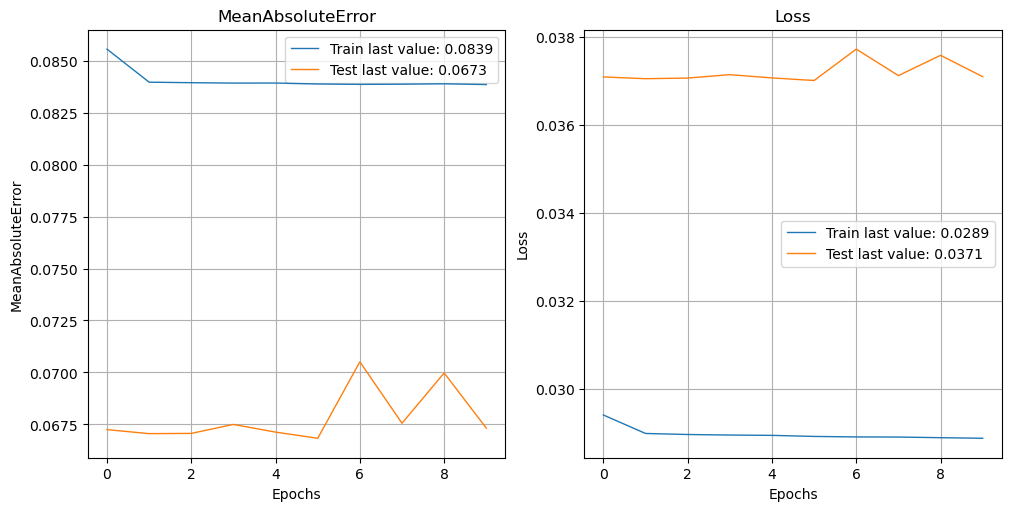

In [ ]:
# 모델을 데이터에 맞추고 Additional 훈련 매개 변수 필요
fit_NN=model.fit(
    NN_train_features,
    NN_train_labels,
    batch_size=256, # GPU 훈련과 관련된 기술적 이유로 2의 거듭제곱인 경우가 많음
    epochs=10,
    validation_data=(NN_test_featurs,NN_test_labels),
    verbose=True
)
show_history(fit_NN)
# 신경망: 가중치 무작위 초기화 -> 문제 우회하는 방법: 난수 생성기 고정 By set_weights() 함수

In [14]:
# 모델의 매개변수 얻기 위해
# get_weights(모델) 함수 호출 가능
import numpy as np
hitratio=np.mean((model.predict(NN_test_featurs).flatten()*NN_test_labels.flatten())>0)
print(f'Hit Ratio:{hitratio}')

2194/2194 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step
Hit Ratio:0.538044097538742
